In [2]:
from matplotlib import pyplot as plt
from simulation import Simulation
import numpy as np
from matplotlib.animation import FuncAnimation

In [3]:
num_iterations = 100
num_particles = 10

sim = Simulation(num_particles, cognitive=0.01, social=0.01)
sim.run(num_iterations)
swarm_positions = sim.positions["swarm"]
iterations = sim.positions["iteration"]

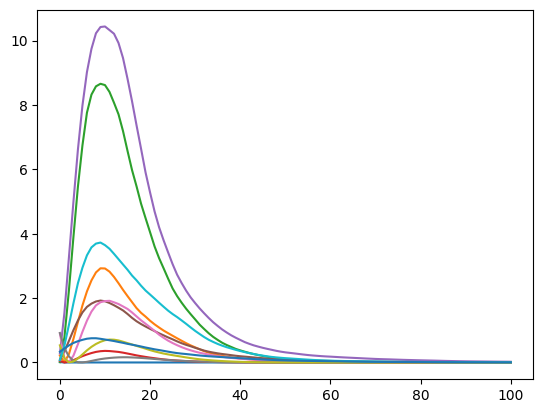

In [4]:
heights = [sim.f(x) for x in swarm_positions]
plt.plot(iterations, heights)

for i in range(num_particles):
    positions = sim.positions[str(i)]
    heights = [sim.f(x) for x in positions]
    plt.plot(iterations, heights)

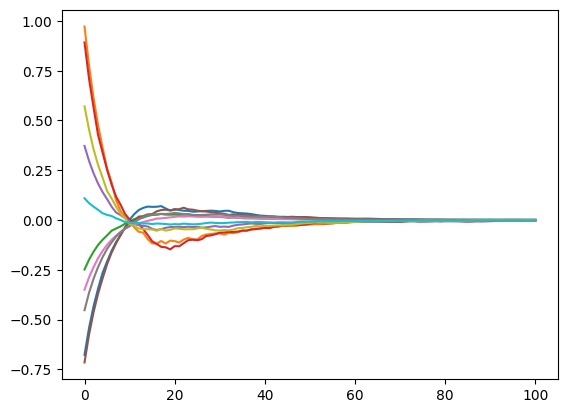

In [5]:
for i in range(num_particles):
    velocities = sim.velocities[str(i)]
    plt.plot(iterations, velocities)

## Animate the Iterations

In [8]:
num_iterations = 100
num_particles = 10
search_space = [-1, 1]
sim = Simulation(num_particles, cognitive=0.01, social=0.05, search_space=search_space)

In [9]:
def plot_sim_state(sim):
    x = np.linspace(search_space[0], search_space[1], 100)
    y = sim.f(x)
    plt.plot(x, y, zorder=1)
    plt.grid()
    for particle in sim.particles:
        plt.scatter(particle.position, sim.f(particle.position), zorder=2)
        plt.quiver(particle.position, sim.f(particle.position), particle.velocity, 0)
    plt.show()

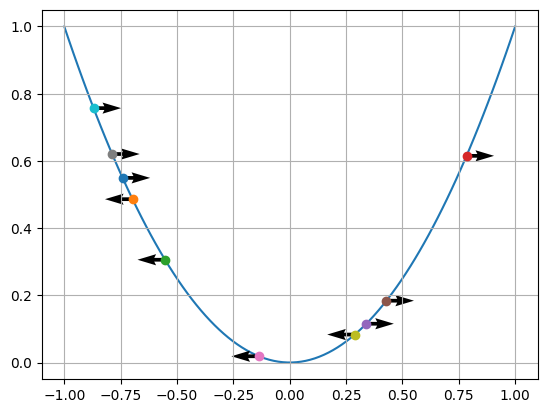

In [10]:
plot_sim_state(sim)

MovieWriter imagemagick unavailable; using Pillow instead.


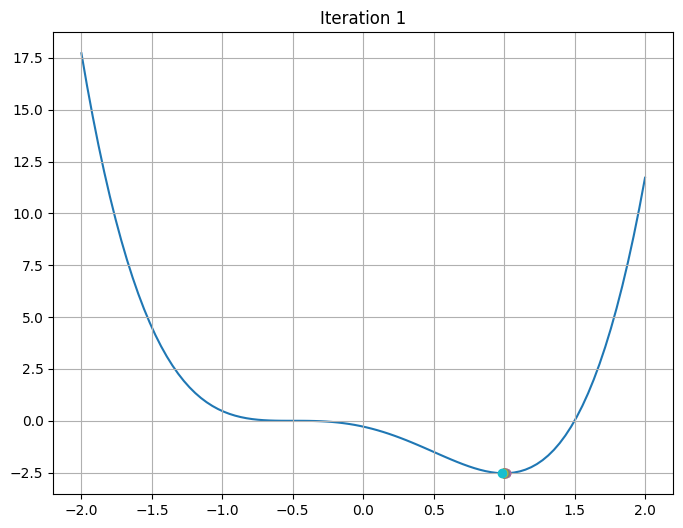

In [11]:
def search_func(x):
    y = 1.5*(x+.5)**4-3*(x+.5)**3 
    return y 


num_iterations = 100
num_particles = 10
search_space = [-1, 1]
sim = Simulation(num_particles, cognitive=0.01, social=0.05, search_space=search_space, search_func=search_func)

fig, ax = plt.subplots(figsize=(8,6))
x = np.linspace(search_space[0]*2, search_space[1]*2, 100)
y = sim.f(x)
ax.plot(x, y, zorder=1)
ax.grid()
scatters = []
for particle in sim.particles:
    scatters.append(plt.scatter(particle.position, sim.f(particle.position), zorder=2))

def animate(i):
    sim.step()
    ax.set_title(f"Iteration {i}")
    for i, particle in enumerate(sim.particles):
        scatters[i].set_offsets([particle.position, sim.f(particle.position)])
    return ax, scatters
    

animation = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=100, blit=False, repeat=True)
animation.save("gifs/PSO_1d.gif", dpi=120, writer="imagemagick")